# Contraste de hipótesis

<b>Hipótesis 1:</b> Hay determinados psicodélicos que se asocian a motivaciones de consumo (sustancias_consumidas --> motivacion_princ)

<b>Hipótesis 2:</b> Hay determinados psicodélicos que se asocian a lugares de consumo (sustancias_consumidas --> donde_consume)

<b>Hipótesis 3:</b> Hay determinados psicodélicos que se asocian a acompañantes (sustancias_consumidas --> con_quien_consume)


### Estudio sobre consumo de sustancias psicodélicas

- Muestra: 1021 personas
- Consumidores de psicodélicos: Sí (73%), No (27%)
- Residencia: Europa (63%), América del sur (30%), América del norte (5%), África (2%), Asia (1,9%), Oceanía (0,09%)
- Rango edad: 18-79
- Rango ingresos: 5000$-100000$
- Sexo: 52% hombres, 48%- mujeres
- Entorno: urbano (79%) y residencial (21%)
- Nivel educativo: Grado universitario(68%), Educ. Primaria (30%), Postgrado (0.6%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

In [2]:
from utils.lista_funciones import tricategorical_analysis, \
    plot_categorical_numerical_relationship, \
    plot_combined_graphs, \
    pinta_distribucion_categoricas, \
    plot_grouped_boxplots, \
    plot_categorical_relationship_fin, \
    plot_grouped_histograms, \
    grafico_dispersion_con_correlacion, \
    bubble_plot, \
    cardinalidad

In [3]:
df = pd.read_excel("./data/1000sujetos.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Columns: 193 entries, edad to sa_psico5
dtypes: int64(155), object(38)
memory usage: 1.5+ MB


## Parte 1/3: Creamos columnas de trabajo y eliminamos el resto

In [5]:
df.head(3)

,edad,sexo,estatus,residencia,entorno_res,empleo,nivel_edu,ingresos,ha_consumido,sustancias_consumidas,consumo_estimado,ultimo_consumo,t_1-ultimo_cons,frec_anual,frec_anual_efect.intenso,ha_microdosificado,sust_micro,sust_combi,ultima_sust_combinadas,efect_advers_bajo.efectos,efect_advers_despues,dieta_para_consumo,con_quien_consume,motivacion,donde_consume,experien_significat,veces_exper_signific,diagnost_alguna_vez,diagnost_actual,trastornos_diagnost,momento_diagnost,medicado_pasado,medicado_presente,consume_para_tratar,intencion_consumo_tratar,abierto_terap_psicodel,dieta_general,frec_deporte,frec_meditacion,bpns_AS1,bpns_AF1,bpns_RS1,bpns_RF1,bpns_CS1,bpns_CF1,bpns_AS2,bpns_AF2,bpns_RS2,bpns_RF2,bpns_CS2,bpns_CF2,bpns_AS3,bpns_AF3,bpns_RS3,bpns_RF3,bpns_CS3,bpns_CF3,bpns_AS4,bpns_AF4,bpns_RS4,bpns_RF4,bpns_CS4,bpns_CF4,panas_EN1,panas_EN2,panas_EP1,panas_EN3,panas_EP2,panas_EN4,panas_EP3,panas_EP4,panas_EN5,panas_EP5,phlms_C1,phlms_A1,phlms_C2,phlms_A2,phlms_C3,phlms_A3,phlms_C4,phlms_A4,phlms_C5,phlms_A5,phlms_C6,phlms_A6,phlms_C7,phlms_A7,phlms_C8,phlms_A8,phlms_C9,phlms_A9,phlms_C10,phlms_A10,swls1,swls2,swls3,swls4,swls5,ipipbf_ex1,ipipbf_a1,ipipbf_es1,ipipbf_n1,ipipbf_i1,ipipbf_ex2,ipipbf_a2,ipipbf_es2,ipipbf_n2,ipipbf_i2,ipipbf_ex3,ipipbf_a3,ipipbf_es3,ipipbf_n3,ipipbf_i3,ipipbf_ex4,ipipbf_a4,ipipbf_es4,ipipbf_n4,ipipbf_i4,ipipbf_ex5,ipipbf_a5,ipipbf_es5,ipipbf_n5,ipipbf_i5,ipipbf_ex6,ipipbf_a6,ipipbf_es6,ipipbf_n6,ipipbf_i6,ipipbf_ex7,ipipbf_a7,ipipbf_es7,ipipbf_n7,ipipbf_i7,ipipbf_ex8,ipipbf_a8,ipipbf_es8,ipipbf_n8,ipipbf_i8,ipipbf_ex9,ipipbf_a9,ipipbf_es9,ipipbf_n9,ipipbf_i9,ipipbf_ex10,ipipbf_a10,ipipbf_es10,ipipbf_n10,ipipbf_i10,sa_psico1,sa_paran1,sa_fob1,sa_psico2,sa_paran2,sa_ans1,sa_host1,sa_fob2,sa_dep1,sa_dep2,sa_dep3,sa_ans2,sa_psico3,sa_sensib1,sa_sensib2,sa_obs1,sa_sensib3,sa_somat1,sa_paran3,sa_obs2,sa_obs3,sa_fob3,sa_somat2,sa_fob4,sa_obs4,sa_somat3,sa_dep4,sa_obs5,sa_somat4,sa_ans3,sa_somat5,sa_sensib4,sa_psico4,sa_host2,sa_host3,sa_sensib5,sa_fob5,sa_ans4,sa_host4,sa_paran4,sa_ans5,sa_dep5,sa_host5,sa_paran5,sa_psico5
0,25,Hombre,Soltero/a,Europa,Urbano,Estudiante,Educación universitaria,"10,000-20,000",Sí,"LSD (ácido, tripi), Psilocibina (setas o trufa...",30,Hace menos de 1 mes,Más de 5 años,Una vez al mes o menos,Varias veces al año,No,Ninguna,"Cafeína, Cannabis, Alcohol","Cafeína, Cannabis, Alcohol","Ansiedad, Mareo, Náuseas, Vómito, Dolor de est...",Ninguno,Ninguna,"Amigos, Pareja","Para divertirme, Para conocerme mejor, Con fin...","En casa, En la naturaleza, En la calle, En fie...",Extremadamente,Muy pocas veces,No,No,Ninguno,Nunca me han diagnosticado,No,No,No,Sí,Sí,Omnívora,Más,Esporádicamente,5,3,5,1,4,2,4,2,5,2,4,2,4,1,5,1,4,2,5,2,5,2,4,2,2,2,3,3,4,1,4,4,1,5,3,2,3,1,1,2,1,4,3,2,4,2,3,4,2,2,2,4,3,2,5,7,5,4,7,3,2,2,4,2,2,5,2,1,3,3,2,2,3,5,4,4,4,2,3,3,4,4,1,4,4,2,5,2,4,5,4,4,2,2,3,2,4,2,4,4,4,2,2,4,3,3,1,1,3,1,1,1,1,1,2,1,1,2,3,2,2,1,1,2,2,2,1,1,1,2,1,1,1,1,1,3,2,1,2,1,1,1,3,1,1,1,1,2,2,1,1,2,1,1
1,30,Hombre,Soltero/a,Europa,Urbano,Jornada completa,Educación universitaria,"10,000-20,000",Sí,"Psilocibina (setas o trufas mágicas), MDMA (éx...",5,Hace más de 1 año,Más de 5 años,Menos de una vez al año,Menos de una vez al año,No,Ninguna,"Cannabis, Alcohol","Cannabis, Alcohol",Ansiedad,"Depresión, Ansiedad, Vómito",Ninguna,Amigos,"Para divertirme, Para escapar de mis problemas","En casa, En la naturaleza",Un poco,Ninguna vez,No,No,Ninguno,Nunca me han diagnosticado,No,No,No,No,Tal vez,Omnívora,Esporádicamente,Nunca,3,2,3,4,4,4,2,4,4,2,4,4,3,2,2,1,2,3,4,4,5,3,4,2,2,1,4,5,2,4,3,4,4,3,4,4,4,4,2,3,2,4,4,4,3,4,4,4,2,3,2,4,5,3,3,5,5,5,3,1,2,4,4,2,5,3,4,1,3,1,2,3,1,2,1,2,2,2,4,2,4,4,1,4,1,3,4,1,4,2,4,3,1,2,2,2,3,1,4,5,2,4,4,4,1,4,4,4,2,1,2,1,1,4,2,1,1,3,4,4,4,2,4,4,2,4,3,2,3,4,1,1,4,3,4,4,3,4,4,1,3,2,1,1,5,2,1,1,3,2,4,1,4,1
2,24,Hombre,Soltero/a,Europa,Urbano,Estudiante,Educación universitaria,No sabe/No contesta,Sí,"LSD (ácido, tripi), Mescalina (peyote, San Ped...",20,Hace menos de 6 meses,Más de 1 añ

In [6]:
#Elimino las columnas que no interesan
columns_to_drop = df.columns[39: ]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       1022 non-null   int64 
 1   sexo                       1022 non-null   object
 2   estatus                    1022 non-null   object
 3   residencia                 1022 non-null   object
 4   entorno_res                1022 non-null   object
 5   empleo                     1022 non-null   object
 6   nivel_edu                  1022 non-null   object
 7   ingresos                   1022 non-null   object
 8   ha_consumido               1022 non-null   object
 9   sustancias_consumidas      1022 non-null   object
 10  consumo_estimado           1022 non-null   object
 11  ultimo_consumo             1022 non-null   object
 12  t_1-ultimo_cons            1022 non-null   object
 13  frec_anual                 1022 non-null   object
 14  frec_anu

## Columna 'sustancias_consumidas_princ'
La columna 'sustancias_consumidas' tiene <u>163 valores únicos</u>\
Creamos nueva columna 'sustancias_consumidas_princ' agrupando por unas pocas categorías

In [8]:
df['sustancias_consumidas'].nunique()

163

In [9]:
# Creamos una nueva columna con la sustancia principal consumida de cada encuestado, y lo dejamos en unas pocas categorías
categorias_sustancias = df.sustancias_consumidas.to_list()

# Obtener la primera palabra de cada string
primeras_palabras = [frase.split(',')[0].split()[0] for frase in categorias_sustancias]
df['sustancias_consumidas_princ'] = primeras_palabras

#Asignamos valores sueltos a ciertas categorías
thc = ['THC', 'porros', 'MARIHUANA', 'marihuana', 'Marihuana']
hongos = ['Hongos', 'PSILOCIBINA','Cucumelos']
ayahuasca = 'Ayahuasca'
otras = ['varias', 'Escopolamina', 'Metilfenidato','Escopolamina', 'Cocaina', 'Varias']

df['sustancias_consumidas_princ'] = df['sustancias_consumidas_princ'].replace(thc, 'Marihuana')
df['sustancias_consumidas_princ'] = df['sustancias_consumidas_princ'].replace(hongos, 'Psilocibina')
df['sustancias_consumidas_princ'] = df['sustancias_consumidas_princ'].replace(ayahuasca, 'DMT')
df['sustancias_consumidas_princ'] = df['sustancias_consumidas_princ'].replace(otras, 'Otras')

#Value counts
df['sustancias_consumidas_princ'].value_counts()

sustancias_consumidas_princ
LSD            506
Ninguna        273
Psilocibina    147
Mescalina       45
MDMA            24
DMT             16
Marihuana        7
Otras            4
Name: count, dtype: int64

## Columna 'motivacion_princ'
La columna 'motivacion' tiene <u>103 valores únicos</u>\
Creamos nueva columna 'motivacion_princ' agrupando por unas pocas categorías

In [10]:
df['motivacion'].nunique()

103

In [11]:
# Creamos una nueva columna con la motivación principal de cada encuestado, y lo dejamos en unas pocas categorías
df['motivacion_princ'] = df['motivacion']

df['motivacion_princ'] = df['motivacion_princ'].apply(lambda x: 'Diversión' if str(x).startswith('Para divertirme') else x)
df['motivacion_princ'] = df['motivacion_princ'].apply(lambda x: 'Autoconocimiento' if str(x).startswith('Para conocerme') else x)
df['motivacion_princ'] = df['motivacion_princ'].apply(lambda x: 'Terapéutico' if str(x).startswith('Con fines terapéuticos') else x)
df['motivacion_princ'] = df['motivacion_princ'].apply(lambda x: 'Espiritual' if str(x).startswith('Con fines religiosos') else x)

motivaciones_permitidas = ['Diversión', 'Autoconocimiento', 'Terapéutico', 'Espiritual', 'No he consumido']
df['motivacion_princ'] = df['motivacion_princ'].where(df['motivacion_princ'].isin(motivaciones_permitidas), other='Otros')

#Value counts
df['motivacion_princ'].value_counts()

motivacion_princ
Diversión           460
No he consumido     272
Autoconocimiento    204
Terapéutico          40
Otros                34
Espiritual           12
Name: count, dtype: int64

## Columna 'donde_consume_princ'
La columna 'donde_consume' tiene <u>65 valores únicos</u>\
Creamos nueva columna 'donde_consume_princ' agrupando por unas pocas categorías

In [12]:
df['donde_consume'].nunique()

65

In [13]:
# Creamos una nueva columna con el lugar de consumo principal de cada encuestado, y lo dejamos en unas pocas categorías

df['donde_consume_princ'] = df['donde_consume']
df['donde_consume_princ'] = df['donde_consume_princ'].apply(lambda x: 'Casa' if str(x).startswith('En casa') else x)
df['donde_consume_princ'] = df['donde_consume_princ'].apply(lambda x: 'Naturaleza' if str(x).startswith('En la naturaleza') else x)
df['donde_consume_princ'] = df['donde_consume_princ'].apply(lambda x: 'Fiestas' if str(x).startswith('En fiestas') else x)
df['donde_consume_princ'] = df['donde_consume_princ'].apply(lambda x: 'Calle' if str(x).startswith('En la calle') else x)

donde_permitidos = ['Casa', 'Naturaleza', 'Fiestas', 'Calle', 'No he consumido']
df['donde_consume_princ'] = df['donde_consume_princ'].where(df['donde_consume_princ'].isin(donde_permitidos), other='Otros')

df.donde_consume_princ.value_counts()

donde_consume_princ
Casa               526
No he consumido    275
Naturaleza         155
Fiestas             38
Otros               17
Calle               11
Name: count, dtype: int64

## Columna 'con_quien_consume_princ'
La columna 'con_quien_consume' tiene <u>83 valores únicos</u>\
Creamos nueva columna 'con_quien_consume_princ' agrupando por unas pocas categorías

In [14]:
df['con_quien_consume'].nunique()

83

In [15]:
# Creamos una nueva columna con la compañía principal de cada encuestado, y lo dejamos en unas pocas categorías
df['con_quien_consume_princ'] = df['con_quien_consume']
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'Amigos' if str(x).startswith('Amigos') else x)
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'Chamán' if str(x).startswith('Chamán') else x)
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'Terapeuta' if str(x).startswith('Terapeuta') else x)
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'Pareja o familia' if str(x).startswith('Pareja') else x)
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'Pareja o familia' if str(x).startswith('Familiares') else x)
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].apply(lambda x: 'No he consumido' if str(x).startswith('No he consumido') else x)

con_quien_permitidos = ['Amigos', 'Chamán', 'Terapeuta','Pareja o familia', 'Solo', 'No he consumido']
df['con_quien_consume_princ'] = df['con_quien_consume_princ'].where(df['con_quien_consume_princ'].isin(con_quien_permitidos), other='Otros')


df.con_quien_consume_princ.value_counts()

con_quien_consume_princ
Amigos              471
No he consumido     277
Chamán              128
Solo                 52
Terapeuta            44
Pareja o familia     40
Otros                10
Name: count, dtype: int64

## Otras operaciones

#### Elimino todas las filas que indican que no han consumido sustancias psicodélicas

In [16]:
#Guardo el dataset y elimino columnas que no interesan para esta parte del estudio

df = df[df['ha_consumido'] == 'Sí']
df = df[df['sustancias_consumidas_princ'] != 'Ninguna']
df = df[df['motivacion_princ'] != 'No he consumido']
df = df[df['donde_consume_princ'] != 'No he consumido']
df = df[df['con_quien_consume_princ'] != 'No he consumido']

#### Guardo el dataset para su uso posterior

In [17]:
df.to_csv('data/1000sujetos_editado.csv', index=False)

#### Elimino todas las columnas que no aplican a esta parte del EDA

In [18]:
columns_to_drop = df.columns[ :39]
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 1021
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sustancias_consumidas_princ  742 non-null    object
 1   motivacion_princ             742 non-null    object
 2   donde_consume_princ          742 non-null    object
 3   con_quien_consume_princ      742 non-null    object
dtypes: object(4)
memory usage: 29.0+ KB


## Parte 2/3: Analizamos variables

### Ficha de dataset

**Dataset**: Encuesta de consumo de sustancias psicotrópicas\
**Muestra**: 1021 personas\
**Periodo**: Enero-abril 2024

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
| sustancias_consumidas_princ | Sustancia consumida indicada en primer lugar en la encuesta | Categórica | Alta | 7 categorías |
| motivacion_princ | Motivación de consumo indicado en primer lugar en la encuesta | Categórica | Alta | 5 categorías |
| donde_consume_princ | Lugar de consumo indicado en primer lugar en la encuesta | Categórica | Alta | 5 categorías |
| con_quien_consume_princ | Compañía de consumo indicado en primer lugar en la encuesta | Categórica | Alta | 6 categorías |

### Sustancias consumidas

Pintamos diagrama de esferas:


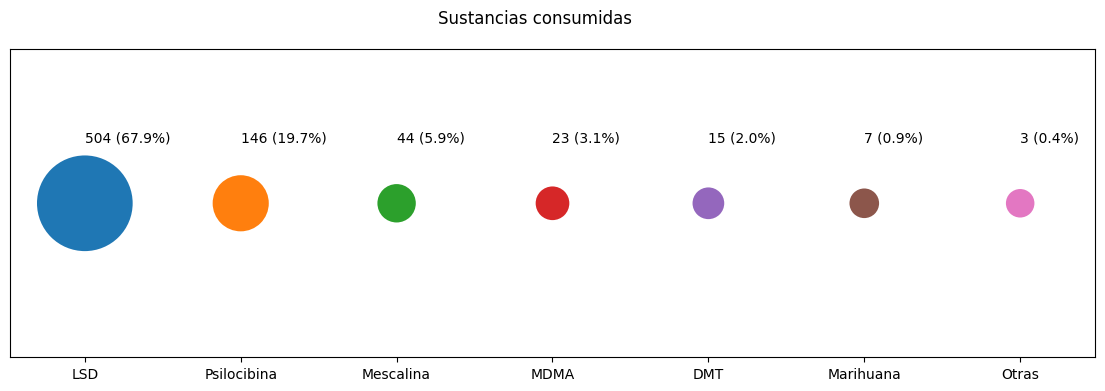

In [20]:
### Creamos figura y axes
fig, axs = plt.subplots(1, 1, figsize=(14,4))
fig.suptitle('Sustancias consumidas');

### Frecuencias absolutas y relativas
axs.cla()
frecuencias = df["sustancias_consumidas_princ"].value_counts()
df_frecuencias = df["sustancias_consumidas_princ"].value_counts().reset_index()
df_frecuencias.columns = ["categorias", "frecuencias"]
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000))
axs.set_xlabel("")
for estado,valor in frecuencias.items():
    axs.text(estado,1.02,f"{valor} ({round(valor*100/frecuencias.sum(),1)}%)")
axs.set_facecolor("none")
axs.yaxis.set_ticks([])
axs.margins(0.08,0)

print("Pintamos diagrama de esferas:")

## Motivación de consumo

Pintamos diagrama de barras:


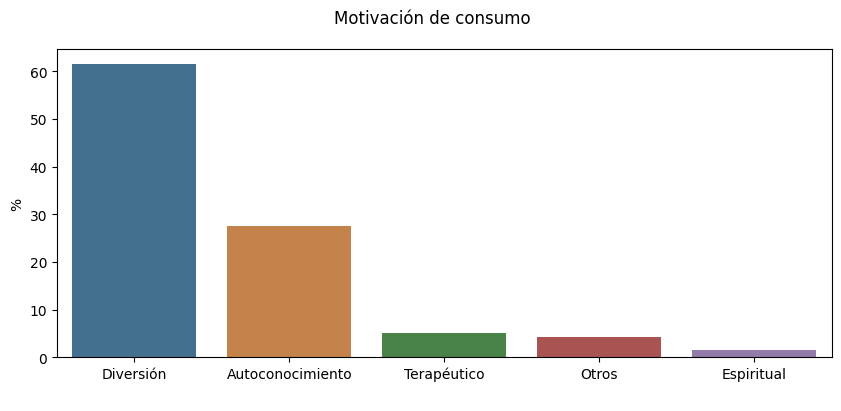

In [21]:
fig,axs = plt.subplots(figsize=(10,4))
fig.suptitle("Motivación de consumo")

sns.countplot(x= 'motivacion_princ', data = df, ax = axs, hue = 'motivacion_princ', legend=False, saturation=0.5, stat='percent',\
              order=['Diversión', 'Autoconocimiento', 'Terapéutico', 'Otros', 'Espiritual'],\
              hue_order=['Diversión', 'Autoconocimiento', 'Terapéutico', 'Otros', 'Espiritual'])
axs.set_xlabel(" ")
axs.set_ylabel("%")

print("Pintamos diagrama de barras:")

## Lugares de consumo

Pintamos diagrama de barras:


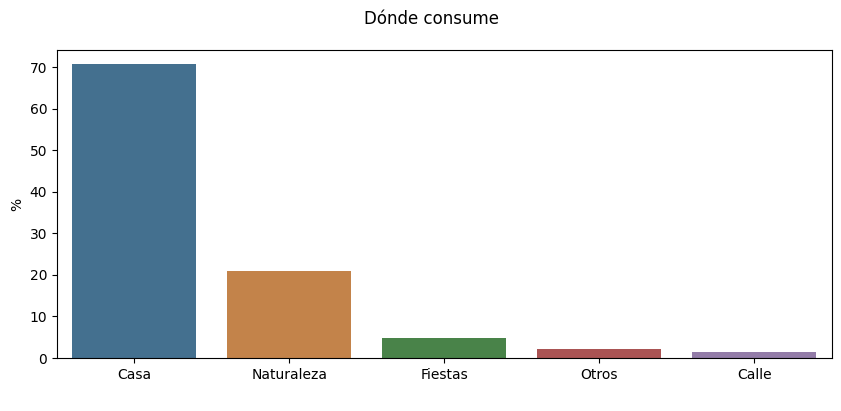

In [22]:
fig,axs = plt.subplots(figsize=(10,4))
fig.suptitle("Dónde consume")

sns.countplot(x= 'donde_consume_princ', data = df, ax = axs, hue = 'donde_consume_princ', legend=False, saturation=0.5, stat='percent',\
               order=['Casa', 'Naturaleza', 'Fiestas', 'Otros', 'Calle'],\
                hue_order=['Casa', 'Naturaleza', 'Fiestas', 'Otros', 'Calle'])
axs.set_xlabel(" ")
axs.set_ylabel("%")

print("Pintamos diagrama de barras:")

## Acompañantes de consumo

Pintamos diagrama de barras:


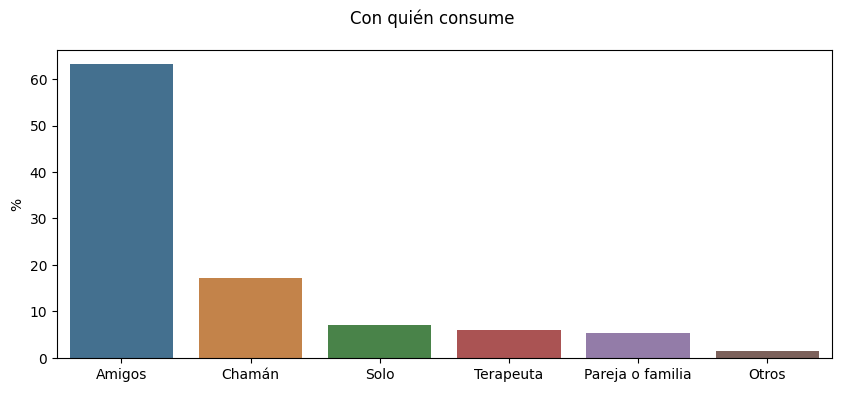

In [23]:
fig,axs = plt.subplots(figsize=(10,4))
fig.suptitle("Con quién consume")

sns.countplot(x= 'con_quien_consume_princ', data = df, ax = axs, hue = 'con_quien_consume_princ', legend=False, saturation=0.5, stat='percent',\
               order=['Amigos', 'Chamán', 'Solo', 'Terapeuta', 'Pareja o familia', 'Otros'],\
                hue_order=['Amigos', 'Chamán', 'Solo', 'Terapeuta', 'Pareja o familia', 'Otros'])
axs.set_xlabel(" ")
axs.set_ylabel("%")
print("Pintamos diagrama de barras:")

## Parte 3/3: Contrastamos hipótesis

### Motivación vs Sustancia consumida
**Sí hay correlación**

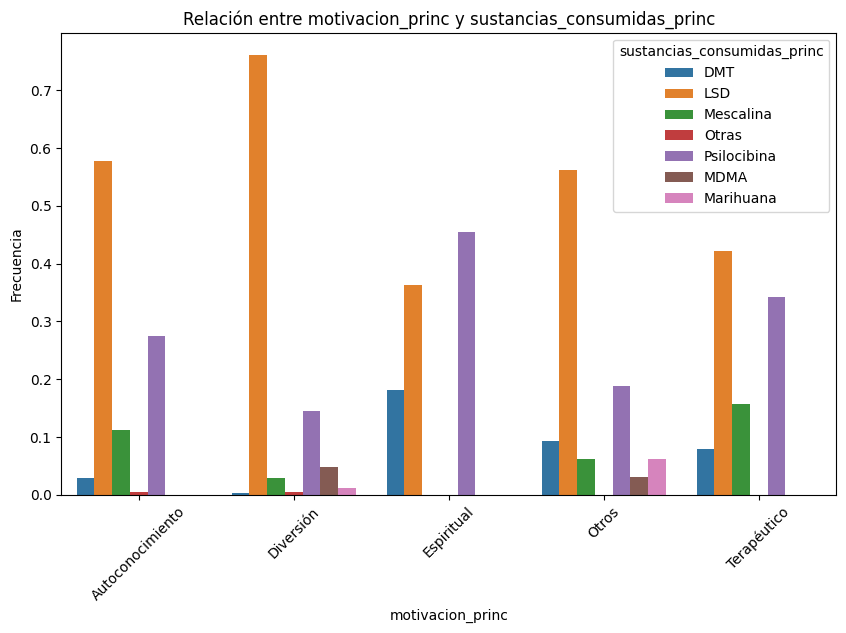

In [24]:
plot_categorical_relationship_fin (df, 'motivacion_princ', 'sustancias_consumidas_princ', relative_freq=True, size_group = 6)

In [25]:
#Aplicamos test Chi Cuadrado
tabla_contingencia_motiv = pd.crosstab(df['motivacion_princ'], df['sustancias_consumidas_princ'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_motiv)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 120.13121477256871
P-Value: 9.194477273695029e-15


### Lugar de consumo vs Sustancia consumida

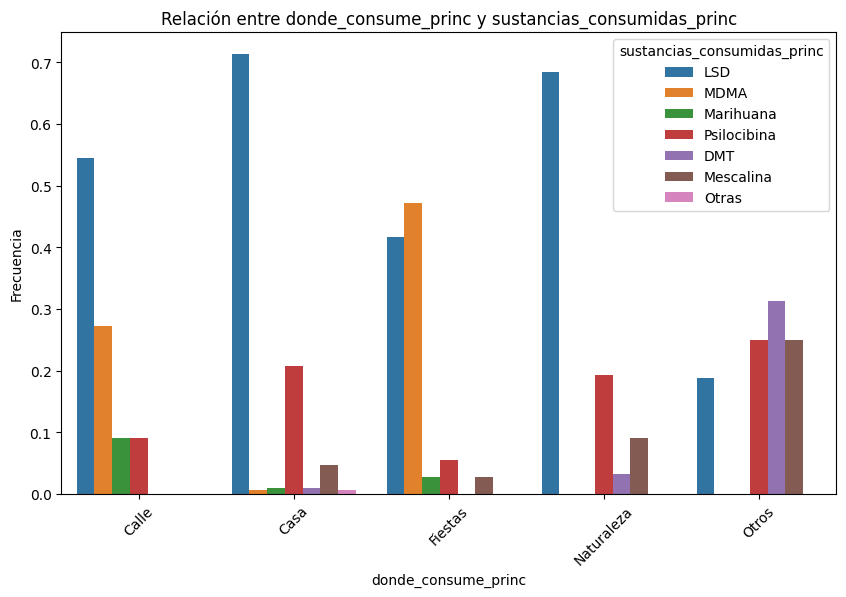

In [26]:
plot_categorical_relationship_fin (df,'donde_consume_princ', 'sustancias_consumidas_princ', relative_freq=True, size_group = 6)

In [27]:
#Aplicamos test Chi Cuadrado
tabla_contingencia_donde = pd.crosstab(df['donde_consume_princ'], df['sustancias_consumidas_princ'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_donde)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 377.6325857912499
P-Value: 2.8795388390558562e-65


### Compañía de consumo vs Sustancia consumida

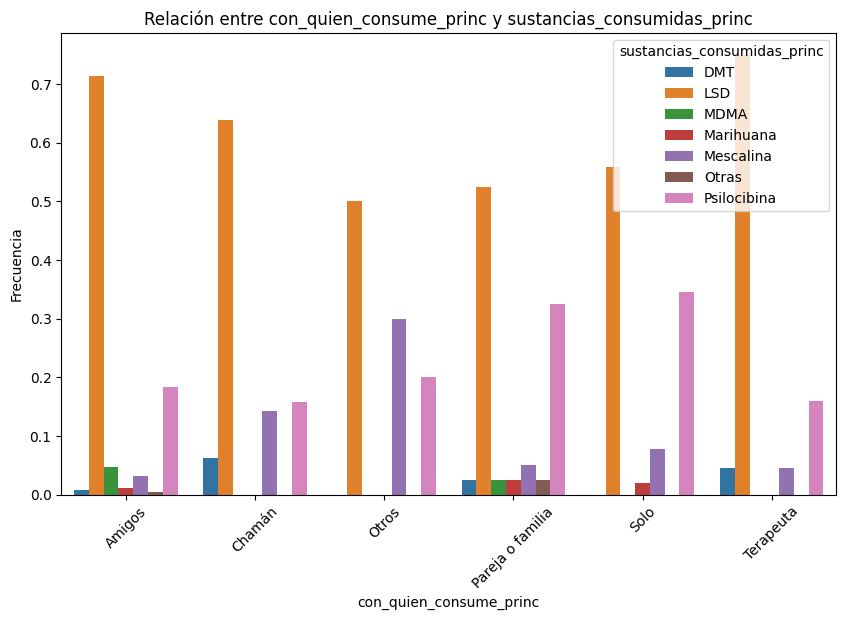

In [28]:
plot_categorical_relationship_fin (df, 'con_quien_consume_princ', 'sustancias_consumidas_princ', relative_freq=True, size_group = 7)

In [29]:
#Aplicamos test Chi Cuadrado

tabla_contingencia_conquien = pd.crosstab(df['con_quien_consume_princ'], df['sustancias_consumidas_princ'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_conquien)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 83.25894039762817
P-Value: 6.646759864380976e-07
